In [30]:
import os
import cv2
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [32]:
main_path = 'Data/Animal_Faces'
train_path = main_path + '/train'
val_path = main_path + '/val'

In [8]:
train_df = pd.DataFrame()
val_df = pd.DataFrame()
train_df['images'] = os.listdir(train_path+'/cat') + os.listdir(train_path+'/dog') + os.listdir(train_path+'/wild')
val_df['images'] = os.listdir(val_path+'/cat') + os.listdir(val_path+'/dog') + os.listdir(val_path+'/wild')

In [9]:
classes = []
paths = []
for image in train_df['images']:
    class_ = image.split('_')[1]
    classes.append(class_)
    paths.append(train_path+'/'+class_+'/'+image)
    
train_df['classes'] = classes
train_df['path'] = paths

In [10]:
train_df.head()

,images,classes,path
0,pixabay_cat_004715.jpg,cat,Data/Animal_Faces/train/cat/pixabay_cat_004715...
1,flickr_cat_000046.jpg,cat,Data/Animal_Faces/train/cat/flickr_cat_000046.jpg
2,pixabay_cat_001858.jpg,cat,Data/Animal_Faces/train/cat/pixabay_cat_001858...
3,pixabay_cat_004374.jpg,cat,Data/Animal_Faces/train/cat/pixabay_cat_004374...
4,flickr_cat_000427.jpg,cat,Data/Animal_Faces/train/cat/flickr_cat_000427.jpg


In [21]:
train_df.loc[100]

images                                 flickr_cat_000272.jpg
classes                                                  cat
path       Data/Animal_Faces/train/cat/flickr_cat_000272.jpg
Name: 100, dtype: object

In [18]:
classes = []
paths = []
for image in val_df['images']:
    class_ = image.split('_')[1]
    classes.append(class_)
    paths.append(val_path+'/'+class_+'/'+image)
    
val_df['classes'] = classes
val_df['path'] = paths

In [19]:
val_df.head()

,images,classes,path
0,pixabay_cat_001992.jpg,cat,Data/Animal_Faces/val/cat/pixabay_cat_001992.jpg
1,pixabay_cat_003512.jpg,cat,Data/Animal_Faces/val/cat/pixabay_cat_003512.jpg
2,pixabay_cat_004178.jpg,cat,Data/Animal_Faces/val/cat/pixabay_cat_004178.jpg
3,pixabay_cat_004337.jpg,cat,Data/Animal_Faces/val/cat/pixabay_cat_004337.jpg
4,pixabay_cat_003218.jpg,cat,Data/Animal_Faces/val/cat/pixabay_cat_003218.jpg


In [ ]:
# Define image size and paths
IMG_SIZE = 512
TRAIN_DIR = 'Data/Animal_Faces/train/'
VAL_DIR = 'Data/Animal_Faces/val/'

# Function to load and preprocess images from a directory
def load_and_preprocess_images_from_directory(directory, img_size):
    categories = ['cat', 'dog', 'wild']
    data = []
    labels = []

    for category in categories:
        path = os.path.join(directory, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (img_size, img_size))
                img_array = img_array / 255.0  # Normalize to [0, 1]
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                pass

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Load and preprocess images
X_train, y_train = load_and_preprocess_images_from_directory(TRAIN_DIR, IMG_SIZE)
X_val, y_val = load_and_preprocess_images_from_directory(VAL_DIR, IMG_SIZE)

# Optionally, create a test set from the validation set if needed
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

dataset = keras.utils.image_dataset_from_directory(
    "/kaggle/input/animal-faces/afhq/train/cat",
    image_size=(128,128),
    label_mode=None,
    batch_size=16,
)
dataset = dataset.map(lambda x: x / 255.)

Found 0 files belonging to 1 classes.


ValueError: No images found in directory /kaggle/input/animal-faces/afhq/train/cat. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [1]:
import opendatasets as od 
import pandas 

od.download( "https://www.kaggle.com/datasets/andrewmvd/animal-faces") 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yangjieqin
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


100%|██████████| 696M/696M [00:12<00:00, 59.4MB/s] 


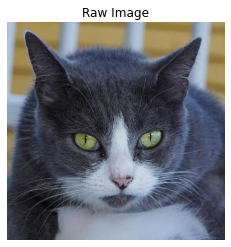

In [17]:
import matplotlib.pyplot as plt

# Read the image
pic = plt.imread("animal-faces/afhq/train/cat/flickr_cat_000005.jpg")

# Create a figure and axes
fig, axes = plt.subplots()

# Turn off the axes
axes.axis('off')

# Display the image
axes.imshow(pic)

# Set the title
axes.set_title("Raw Image")

# Show the plot
plt.show()

In [18]:
pic

array([[[173, 189, 214],
        [173, 189, 214],
        [173, 191, 215],
        ...,
        [169, 149,  99],
        [169, 149,  99],
        [169, 149,  99]],

       [[173, 189, 214],
        [173, 189, 214],
        [173, 191, 215],
        ...,
        [170, 150, 100],
        [170, 150, 100],
        [169, 149,  99]],

       [[173, 189, 214],
        [173, 189, 214],
        [173, 191, 215],
        ...,
        [170, 150,  99],
        [170, 150,  99],
        [170, 150,  99]],

       ...,

       [[ 69,  71,  84],
        [ 67,  69,  82],
        [ 63,  65,  78],
        ...,
        [ 47,  49,  64],
        [ 46,  48,  63],
        [ 45,  47,  62]],

       [[ 68,  70,  83],
        [ 66,  68,  81],
        [ 63,  65,  78],
        ...,
        [ 45,  47,  62],
        [ 43,  45,  60],
        [ 42,  44,  59]],

       [[ 67,  69,  82],
        [ 65,  67,  80],
        [ 62,  64,  77],
        ...,
        [ 43,  45,  60],
        [ 42,  44,  59],
        [ 40,  42,  57]]

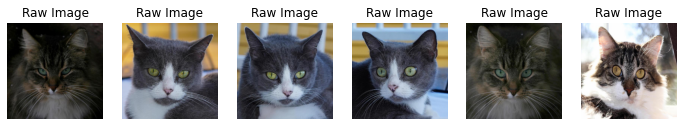

In [29]:
import matplotlib.pyplot as plt
import numpy as np

idxs = [2, 4, 5, 6, 7, 9]
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
for i, idx in enumerate(idxs):
    pic = plt.imread("animal-faces/afhq/train/cat/flickr_cat_00000{}.jpg".format(idx))
    
    axes[i].axis('off')
    axes[i].imshow(pic)
    axes[i].set_title("Raw Image")

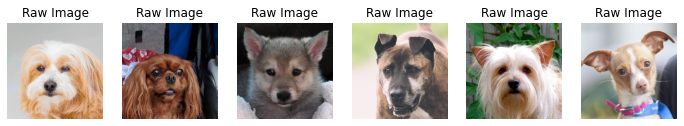

In [30]:
idxs = [2, 4, 5, 6, 7, 9]
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
for i, idx in enumerate(idxs):
    pic = plt.imread("animal-faces/afhq/train/dog/flickr_dog_00000{}.jpg".format(idx))
    
    axes[i].axis('off')
    axes[i].imshow(pic)
    axes[i].set_title("Raw Image")

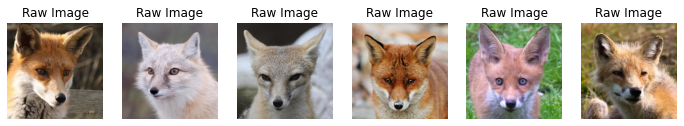

In [35]:
idxs = [2, 3, 5, 6, 7, 9]
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
for i, idx in enumerate(idxs):
    pic = plt.imread("animal-faces/afhq/train/wild/flickr_wild_00000{}.jpg".format(idx))
    
    axes[i].axis('off')
    axes[i].imshow(pic)
    axes[i].set_title("Raw Image")

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.transforms as T
import PIL
from PIL import Image
import numpy as np
import os
# import os.path as osp

from FCN.dataset import CMP_Facade_DB

os.environ["CUDA_VISIBLE_DEVICES"]="0"

def get_full_list(root_dir):
    data_list = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):
                data_list.append(os.path.join(root, file))
    return sorted(data_list)

TRAIN_SIZE = 500
VAL_SIZE = 30
TEST_SIZE = 70

# Assuming that the structure is:
# root_dir/
#   train/
#     cat/
#     dog/
#     wild/
#   val/
#     cat/
#     dog/
#     wild/

train_data_list = get_full_list("afhq/train")
val_data_list = get_full_list("afhq/val")
# Test set is assumed to be collected separately or not used in this example

train_data_set = CMP_Facade_DB(train_data_list[:TRAIN_SIZE])
val_data_set = CMP_Facade_DB(val_data_list[:VAL_SIZE])
# Placeholder for test data set; modify according to actual usage
test_data_set = CMP_Facade_DB(train_data_list[TRAIN_SIZE:TRAIN_SIZE + TEST_SIZE])

print("Training Set Size:", len(train_data_set))
print("Validation Set Size:", len(val_data_set))
print("Test Set Size:", len(test_data_set))

train_loader = DataLoader(train_data_set, batch_size=1, shuffle=True)
val_loader = DataLoader(val_data_set, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=1, shuffle=False)

USE_GPU = True

dtype = torch.float32  # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)


ModuleNotFoundError: No module named 'FCN'

In [62]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import os

# Custom Dataset Class
class AnimalFacesDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, img_path

def get_full_list(root_dir):
    data_list = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):
                data_list.append(os.path.join(root, file))
    return sorted(data_list)

# Image transformations (if any)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

TRAIN_SIZE = 1000
VAL_SIZE = 100

train_data_list = get_full_list("animal-faces/afhq/train")
val_data_list = get_full_list("animal-faces/afhq/val")

train_data_set = AnimalFacesDataset(train_data_list[:TRAIN_SIZE], transform=transform)
val_data_set = AnimalFacesDataset(val_data_list[:VAL_SIZE], transform=transform)

print("Training Set Size:", len(train_data_set))
print("Validation Set Size:", len(val_data_set))

train_loader = DataLoader(train_data_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data_set, batch_size=32, shuffle=True)

USE_GPU = True

dtype = torch.float32  # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [52]:
train_loader

Visualizing Training Set


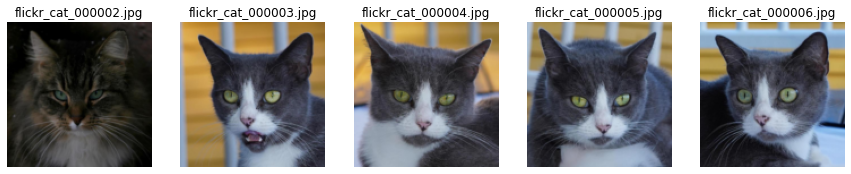

Visualizing Validation Set


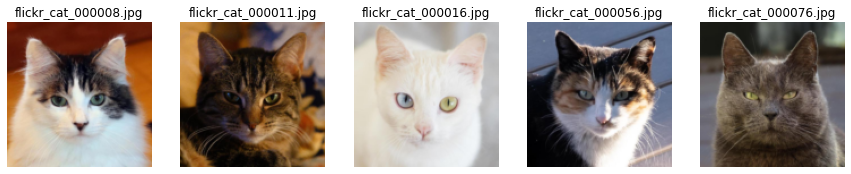

In [54]:
# Utility function to visualize images
def visualize_dataset(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image, path = dataset[i]
        axes[i].imshow(image.permute(1, 2, 0))  # Change dimension order for plotting
        axes[i].set_title(os.path.basename(path))
        axes[i].axis('off')
    plt.show()

# Visualize a few samples from each dataset
print("Visualizing Training Set")
visualize_dataset(train_data_set, num_images=5)

print("Visualizing Validation Set")
visualize_dataset(val_data_set, num_images=5)

[0/5][0/229] Loss_D: 1.4017 Loss_G: 3.6384 D(x): 0.5415 D(G(z)): 0.5332/0.0275
[0/5][50/229] Loss_D: 2.5080 Loss_G: 11.7313 D(x): 0.9324 D(G(z)): 0.9060/0.0000
[0/5][100/229] Loss_D: 0.7223 Loss_G: 2.8179 D(x): 0.5681 D(G(z)): 0.0329/0.0706
[0/5][150/229] Loss_D: 0.8357 Loss_G: 1.9610 D(x): 0.5341 D(G(z)): 0.0895/0.1662
[0/5][200/229] Loss_D: 0.6756 Loss_G: 2.4804 D(x): 0.6211 D(G(z)): 0.0793/0.0965


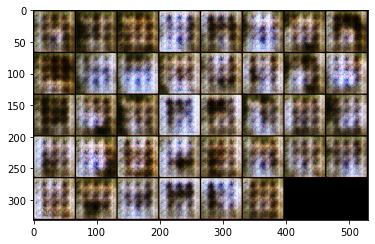

[1/5][0/229] Loss_D: 1.0145 Loss_G: 4.1147 D(x): 0.8786 D(G(z)): 0.5329/0.0215
[1/5][50/229] Loss_D: 0.9729 Loss_G: 1.5382 D(x): 0.4935 D(G(z)): 0.0764/0.2433
[1/5][100/229] Loss_D: 0.7716 Loss_G: 1.5824 D(x): 0.5466 D(G(z)): 0.0757/0.2350
[1/5][150/229] Loss_D: 0.4993 Loss_G: 3.8489 D(x): 0.8353 D(G(z)): 0.2496/0.0274
[1/5][200/229] Loss_D: 0.4626 Loss_G: 2.8716 D(x): 0.7379 D(G(z)): 0.1005/0.0798


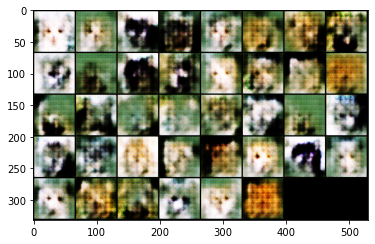

[2/5][0/229] Loss_D: 0.7362 Loss_G: 2.5825 D(x): 0.6016 D(G(z)): 0.1207/0.1042
[2/5][50/229] Loss_D: 0.3588 Loss_G: 3.2087 D(x): 0.8643 D(G(z)): 0.1564/0.0512
[2/5][100/229] Loss_D: 0.5683 Loss_G: 2.9623 D(x): 0.6913 D(G(z)): 0.0731/0.0702
[2/5][150/229] Loss_D: 0.5606 Loss_G: 4.5581 D(x): 0.8744 D(G(z)): 0.2940/0.0165
[2/5][200/229] Loss_D: 0.8087 Loss_G: 6.2429 D(x): 0.9138 D(G(z)): 0.4642/0.0037


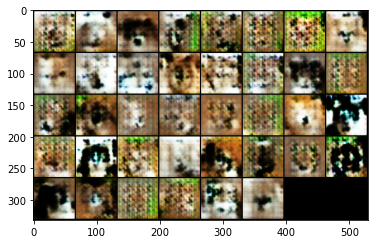

[3/5][0/229] Loss_D: 0.7360 Loss_G: 3.5213 D(x): 0.7400 D(G(z)): 0.2492/0.0446
[3/5][50/229] Loss_D: 0.9260 Loss_G: 5.1153 D(x): 0.9530 D(G(z)): 0.5190/0.0108
[3/5][100/229] Loss_D: 0.9837 Loss_G: 6.1812 D(x): 0.8781 D(G(z)): 0.5007/0.0034
[3/5][150/229] Loss_D: 1.7876 Loss_G: 6.6124 D(x): 0.9727 D(G(z)): 0.7427/0.0026
[3/5][200/229] Loss_D: 0.5274 Loss_G: 3.5825 D(x): 0.7642 D(G(z)): 0.1736/0.0372


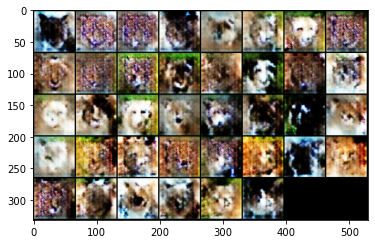

[4/5][0/229] Loss_D: 0.6843 Loss_G: 3.9428 D(x): 0.7794 D(G(z)): 0.2700/0.0309
[4/5][50/229] Loss_D: 0.7501 Loss_G: 4.3302 D(x): 0.7626 D(G(z)): 0.3132/0.0192
[4/5][100/229] Loss_D: 0.5942 Loss_G: 3.8496 D(x): 0.8215 D(G(z)): 0.2707/0.0302
[4/5][150/229] Loss_D: 0.8332 Loss_G: 3.9628 D(x): 0.7029 D(G(z)): 0.2755/0.0368
[4/5][200/229] Loss_D: 0.7572 Loss_G: 5.3240 D(x): 0.8447 D(G(z)): 0.3793/0.0074


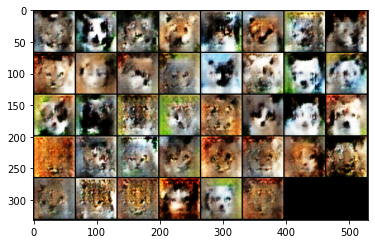

Training complete


In [56]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dset
import os
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, nz, nc, ngf):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, nc, ndf):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Hyperparameters
nz = 100  # Size of z latent vector (i.e. size of generator input)
ngf = 64  # Size of feature maps in generator
ndf = 64  # Size of feature maps in discriminator
nc = 3    # Number of channels in the training images. For color images this is 3

# Initialize the generator and discriminator
netG = Generator(nz, nc, ngf).cuda()
netD = Discriminator(nc, ndf).cuda()

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Create the dataset class
class AnimalFacesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_dict = {'cat': 0, 'dog': 1, 'wild': 2}

        for label in os.listdir(root_dir):
            for image_name in os.listdir(os.path.join(root_dir, label)):
                self.image_paths.append(os.path.join(root_dir, label, image_name))
                self.labels.append(self.label_dict[label])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load datasets
train_dataset = AnimalFacesDataset(root_dir='animal-faces/afhq/train', transform=transform)
val_dataset = AnimalFacesDataset(root_dir='animal-faces/afhq/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# Training loop
num_epochs = 5
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Update Discriminator
        netD.zero_grad()
        real_images = images.cuda()
        batch_size = real_images.size(0)
        labels = torch.full((batch_size,), real_label, dtype=torch.float, device='cuda')

        output = netD(real_images).view(-1)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, nz, 1, 1, device='cuda')
        fake_images = netG(noise)
        labels.fill_(fake_label)

        output = netD(fake_images.detach()).view(-1)
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        labels.fill_(real_label)

        output = netD(fake_images).view(-1)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if i % 50 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(train_loader)}] Loss_D: {errD.item():.4f} Loss_G: {errG.item():.4f} D(x): {D_x:.4f} D(G(z)): {D_G_z1:.4f}/{D_G_z2:.4f}')

    # Save the fake images periodically
    with torch.no_grad():
        fake_images = netG(noise).detach().cpu()
    img_grid = torchvision.utils.make_grid(fake_images, padding=2, normalize=True)
    plt.imshow(np.transpose(img_grid, (1, 2, 0)))
    plt.show()

# Save the models
torch.save(netG.state_dict(), 'generator.pth')
torch.save(netD.state_dict(), 'discriminator.pth')

print("Training complete")

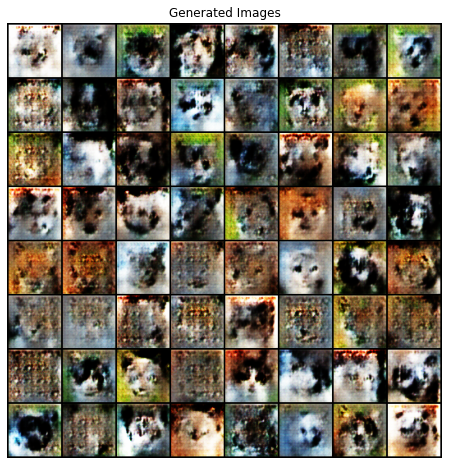

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Function to visualize generated images
def visualize_generated_images(generator, num_images=64, nz=100):
    generator.eval()
    noise = torch.randn(num_images, nz, 1, 1, device='cuda')
    with torch.no_grad():
        fake_images = generator(noise).detach().cpu()
    img_grid = vutils.make_grid(fake_images, padding=2, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Generated Images")
    plt.imshow(np.transpose(img_grid, (1, 2, 0)))
    plt.show()

# Visualize generated images
visualize_generated_images(netG, num_images=64, nz=nz)


In [58]:
from torch.nn.functional import softmax
from torchvision.models import inception_v3
from scipy.stats import entropy
import numpy as np

# Function to calculate Inception Score
def inception_score(images, cuda=True, batch_size=32, resize=True, splits=10):
    N = len(images)
    assert batch_size > 0
    assert N > batch_size
    
    dtype = torch.cuda.FloatTensor if cuda else torch.FloatTensor

    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
    inception_model.eval()
    up = nn.Upsample(size=(299, 299), mode='bilinear').type(dtype)
    
    def get_pred(x):
        if resize:
            x = up(x)
        x = inception_model(x)
        return softmax(x, dim=1).data.cpu().numpy()

    preds = np.zeros((N, 1000))

    for i in range(0, N, batch_size):
        batch = images[i:i + batch_size]
        batch = batch.type(dtype)
        preds[i:i + batch_size] = get_pred(batch)

    split_scores = []

    for k in range(splits):
        part = preds[k * (N // splits): (k + 1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# Generate images for evaluation
num_eval_images = 1000
eval_noise = torch.randn(num_eval_images, nz, 1, 1, device='cuda')
with torch.no_grad():
    eval_images = netG(eval_noise).detach().cpu()

# Resize images to the required size (299x299) for Inception model
resized_images = torch.nn.functional.interpolate(eval_images, size=(299, 299), mode='bilinear')

# Calculate Inception Score
mean, std = inception_score(resized_images)
print(f"Inception Score: {mean} ± {std}")

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /home/y3qin/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 320MB/s] 


RuntimeError: Calculated padded input size per channel: (2 x 2). Kernel size: (3 x 3). Kernel size can't be greater than actual input size

In [59]:
pip install pytorch-fid

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [61]:
from pytorch_fid import fid_score

# Function to save generated images
def save_images(images, path):
    os.makedirs(path, exist_ok=True)
    for i, img in enumerate(images):
        vutils.save_image(img, os.path.join(path, f"{i}.png"), normalize=True)

# Save generated images
save_images(eval_images, 'generated_images')

# Assume real images are in 'afhq/test'
fid_value = fid_score.calculate_fid_given_paths(['animal-faces/afhq/val', 'generated_images'], batch_size=50, device='cuda', dims=2048)
print(f"FID Score: {fid_value}")

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /home/y3qin/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:01<00:00, 64.6MB/s]


ValueError: batch_size should be a positive integer value, but got batch_size=0

In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
from torchvision.models import inception_v3
from scipy.stats import entropy

# Custom Dataset Class with Labels
class AnimalFacesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_dict = {'cat': 0, 'dog': 1, 'wild': 2}

        for label in os.listdir(root_dir):
            for image_name in os.listdir(os.path.join(root_dir, label)):
                self.image_paths.append(os.path.join(root_dir, label, image_name))
                self.labels.append(self.label_dict[label])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load datasets
train_dataset = AnimalFacesDataset(root_dir='animal-faces/afhq/train', transform=transform)
val_dataset = AnimalFacesDataset(root_dir='animal-faces/afhq/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, nz, nc, ngf, num_classes):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, nz)
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz * 2, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embedding = self.label_emb(labels)
        gen_input = torch.cat((noise, label_embedding), -1).unsqueeze(2).unsqueeze(3)
        return self.main(gen_input)

# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, nc, ndf, num_classes):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, nc * 64 * 64)
        self.main = nn.Sequential(
            nn.Conv2d(nc + 1, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embedding = self.label_emb(labels).view(labels.size(0), 1, 64, 64)
        d_in = torch.cat((img, label_embedding), 1)
        return self.main(d_in)

# Hyperparameters
nz = 100  # Size of z latent vector (i.e. size of generator input)
ngf = 64  # Size of feature maps in generator
ndf = 64  # Size of feature maps in discriminator
nc = 3    # Number of channels in the training images. For color images this is 3
num_classes = 3

# Initialize the generator and discriminator
netG = Generator(nz, nc, ngf, num_classes).cuda()
netD = Discriminator(nc, ndf, num_classes).cuda()

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [66]:
# Function to visualize generated images for a specific category
def visualize_generated_images_by_category(generator, num_images=64, nz=100, category_label=0):
    generator.eval()
    noise = torch.randn(num_images, nz, 1, 1, device='cuda')
    category_labels = torch.full((num_images,), category_label, dtype=torch.int64, device='cuda')
    with torch.no_grad():
        fake_images = generator(noise, category_labels).detach().cpu()
    img_grid = vutils.make_grid(fake_images, padding=2, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title(f"Generated Images - Category {category_label}")
    plt.imshow(np.transpose(img_grid, (1, 2, 0)))
    plt.show()

# Function to calculate Inception Score for a specific category
def inception_score_by_category(images, cuda=True, batch_size=32, resize=True, splits=10):
    N = len(images)
    assert batch_size > 0
    assert N > batch_size

    dtype = torch.cuda.FloatTensor if cuda else torch.FloatTensor

    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
    inception_model.eval()
    up = nn.Upsample(size=(299, 299), mode='bilinear').type(dtype)

    def get_pred(x):
        if resize:
            x = up(x)
        x = inception_model(x)
        return softmax(x, dim=1).data.cpu().numpy()

    preds = np.zeros((N, 1000))

    for i in range(0, N, batch_size):
        batch = images[i:i + batch_size]
        batch = batch.type(dtype)
        preds[i:i + batch_size] = get_pred(batch)

    split_scores = []

    for k in range(splits):
        part = preds[k * (N // splits): (k + 1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

# Generate and evaluate images for each category
categories = {'cat': 0, 'dog': 1, 'wild': 2}
for category_name, category_label in categories.items():
    print(f"Generating and evaluating images for category: {category_name}")

    # Generate images for the current category
    num_eval_images = 1000
    eval_noise = torch.randn(num_eval_images, nz, 1, 1, device='cuda')
    category_labels = torch.full((num_eval_images,), category_label, dtype=torch.int64, device='cuda')
#     with torch.no_grad():
#         eval_images = netG(eval_noise, category_labels).detach().cpu()

    # Resize images to the required size (299x299) for Inception model
    resized_images = torch.nn.functional.interpolate(eval_images, size=(299, 299), mode='bilinear')

    # Calculate Inception Score
    mean, std = inception_score_by_category(resized_images)
    print(f"Inception Score for {category_name}: {mean} ± {std}")

    # Visualize generated images for the current category
    visualize_generated_images_by_category(netG, num_images=64, nz=nz, category_label=category_label)


Generating and evaluating images for category: cat


/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inception Score for cat: 2.5558350206585496 ± 0.09301217282194264


RuntimeError: Tensors must have same number of dimensions: got 4 and 2